In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read all the words
words = open("names.txt").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [11]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], [] # inputs and targets
for w in words[:5]:
    print(w)
    context = [0] * block_size # initialize with all '.' which is index 0
    for ch in w + '.': # for each character plus the special end character
        ix = stoi[ch] # get the index of the character
        X.append(context) # add the current context to inputs
        Y.append(ix) # add the current character index to targets
        print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] # slide the context window, append the new character (crop and append)

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
olivia
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
ava
... -----> a
..a -----> v
.av -----> a
ava -----> .
isabella
... -----> i
..i -----> s
.is -----> a
isa -----> b
sab -----> e
abe -----> l
bel -----> l
ell -----> a
lla -----> .
sophia
... -----> s
..s -----> o
.so -----> p
sop -----> h
oph -----> i
phi -----> a
hia -----> .


In [12]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [13]:
C = torch.randn((27, 2)) # 27 characters, 2-dimensional character embeddings

In [14]:
emb = C[X] #(batch, block_size, 2)
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((3*2, 100))
b1 = torch.randn(100)

In [16]:
emb[:, 0, :].shape

torch.Size([32, 2])

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape  # not general, cannot work with different block sizes

torch.Size([32, 6])

In [23]:
torch.unbind(emb, dim=1)

(tensor([[-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [ 0.3770, -1.0674],
         [ 0.6306, -0.2327],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.7095,  1.4977],
         [-0.7522,  0.5233],
         [-0.3069,  1.6098],
         [ 0.2272,  0.6587],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.0888,  0.4837],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.3069,  1.6098],
         [ 1.3952, -0.3301],
         [-0.0888,  0.4837],
         [-0.0473,  0.9424],
         [ 0.3770, -1.0674],
         [-0.7522,  0.5233],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [ 1.3952, -0.3301],
         [-0.7095,  1.4977],
         [-0.1379,  0.2426],
         [ 0.9927, -0.7458]]),
 tensor([[-0.4351,  0.3015],
         [-0.4351,  0.3015],
         [ 0

In [21]:
len(torch.unbind(emb, dim=1))

3

In [ ]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape  # inefficient as it makes a new copy of the data in the memory

torch.Size([32, 6])

In [25]:
# a better way to do the above
emb.view(emb.shape[0], -1).shape

torch.Size([32, 6])

In [28]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [29]:
h = emb.view(emb.shape[0], -1) @ W1 + b1 # (batch_size, 6) @ (6, 100) + (100,) --> (batch_size, 100)

In [31]:
h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)

In [32]:
h.shape

torch.Size([32, 100])

In [33]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [34]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [36]:
counts = logits.exp()

In [37]:
prob = counts / counts.sum(1, keepdim=True)

In [38]:
prob.shape

torch.Size([32, 27])

In [39]:
prob[0].sum()

tensor(1.0000)

In [ ]:
# 32 examples, for each example, get the probability of the correct character (from the corresponding row in prob), 
# then take the log, then take the mean over all examples, then negate it to get the average loss
# this is the same as F.cross_entropy(logits, Y)
# this is called the negative log likelihood loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(11.3539)

In [ ]:
# -------------------------- now made respectable :) ----------------------------

In [5]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], [] # inputs and targets
for w in words:
    # print(w)
    context = [0] * block_size # initialize with all '.' which is index 0
    for ch in w + '.': # for each character plus the special end character
        ix = stoi[ch] # get the index of the character
        X.append(context) # add the current context to inputs
        Y.append(ix) # add the current character index to targets
        # print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] # slide the context window, append the new character (crop and append)

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [7]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [8]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.rand((27, 10), generator=g)
W1 = torch.randn((3*10, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [9]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [10]:
for p in parameters:
    p.requires_grad = True

In [11]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [12]:
lri = []
lossi = []
stepi = []

In [20]:
for i in range(200000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    #lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

#print(loss.item())

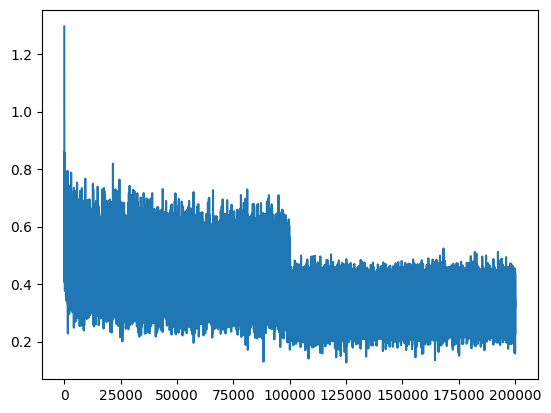

In [21]:
plt.plot(stepi, lossi)

In [22]:
emb = C[Xtr] # (examples, block_size, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.192078113555908

In [23]:
emb = C[Xdev] # (examples, block_size, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.20902419090271

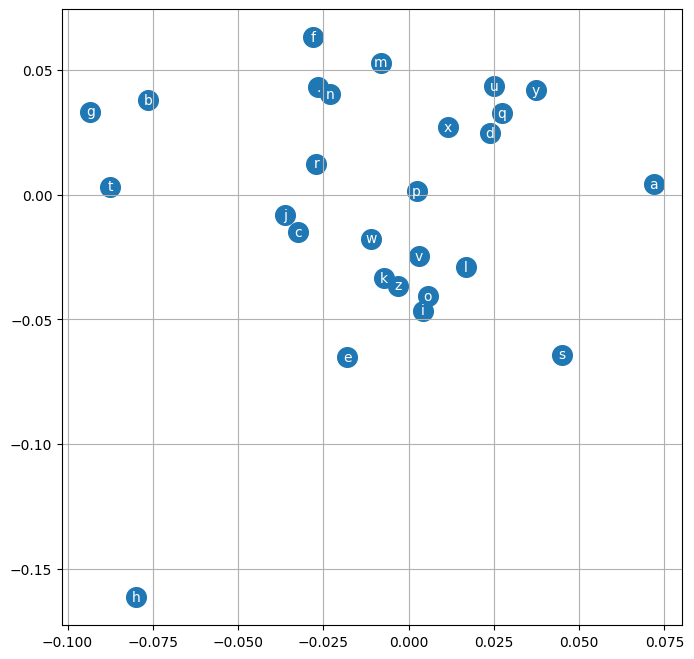

In [162]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [25]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
mayah.
see.
med.
ryll.
rethantendra.
gradered.
eliah.
milopaleigh.
estanar.
kayzios.
kamin.
shravrishiries.
kin.
reth.
kox.
terofiu.
zey.
der.
yarue.
